# Capstone Project: Predicting Credit Consumption of Customers

## Project Overview

This project aims to develop a machine learning model to predict the average credit card consumption of customers for a leading bank. Understanding customer spending patterns is crucial for effective customer relationship management (CRM) and for devising targeted marketing strategies.


 ## 1. Introduction

 ### 1.1 Business Context
 Analytics is increasingly driving every industry by leveraging technology platforms to collect information from various sources and understand customer wants. The Credit Card industry is particularly data-rich, offering infinite ways to understand customer behavior. Data from credit card processors reveals consumer types and their business spending behaviors. This understanding enables companies to develop marketing campaigns that directly address consumer behavior, leading to better sales and revenue growth.

 Understanding individual credit card consumption patterns is vital for effective customer relationship management. This allows banks to customize offerings for consumers and formulate strategic marketing plans. Therefore, it is imperative to study the relationship between consumer characteristics and their consumption patterns.

 ### 1.2 Business Objectives
 The leading bank has provided historical data including customer demographics, behavioral data (information on liabilities, assets, and transaction history), and credit consumption. This data covers credit card spend in the previous three months (April, May, June) and includes their expected average spend in the coming three months (July, August, September).

 The primary objectives of this project are:
 * To build a robust machine learning model using customer data where credit consumption (`cc_cons`) is non-missing.
 * To predict the credit consumption for the next three months for customers having missing `cc_cons` values.

 ### 1.3 Evaluation Metric
 The model will be validated using **Root Mean Square Percentage Error (RMSPE)** between the predicted credit card consumption and the actual credit consumption.


 ## 2. Data Description

 The bank provided three distinct datasets:
 * `CustomerDemographics.csv`
 * `CustomerBehaviorData.csv`
 * `CreditConsumptionData.csv`

 These datasets were merged based on a common `ID` field to create a comprehensive dataset for analysis and modeling.



### 2.1 Data Dictionary

 **a. CustomerDemographics.csv**
 * **ID**: Customer ID - Unique ID for every Customer
 * **Account_type**: Account Type (current or saving)
 * **Gender**: Gender of customer (M or F)
 * **Age**: Age of customer
 * **Income**: Income Levels (High/Medium/Low)
 * **Emp_Tenure_Years**: Experience - Employment Tenure of customer in Years
 * **Tenure_with_Bank**: Number of years with bank
 * **Region_code**: Code assigned to region of residence (has order)
 * **NetBanking_Flag**: Whether customer is using net banking for the transactions
 * **Avg_days_between_transaction**: Average days between two transactions

 **b. CustomerBehaviorData.csv**
 * **ID**: Customer ID - Unique ID for every Customer
 * **CC_cons_apr**: Credit card spend in April
 * **DC_cons_apr**: Debit card spend in April
 * **CC_cons_may**: Credit card spend in May
 * **DC_cons_may**: Debit card spend in May
 * **CC_cons_jun**: Credit card spend in June
 * **DC_cons_jun**: Debit card spend in June
 * **CC_count_apr**: Number of credit card transactions in April
 * **CC_count_may**: Number of credit card transactions in May
 * **CC_count_jun**: Number of credit card transactions in June
 * **DC_count_apr**: Number of debit card transactions in April
 * **DC_count_may**: Number of debit card transactions in May
 * **DC_count_jun**: Number of debit card transactions in June
 * **Card_lim**: Maximum Credit Card Limit allocated
 * **Personal_loan_active**: Active personal loan with other bank
 * **Vehicle_loan_active**: Active Vehicle loan with other bank
 * **Personal_loan_closed**: Closed personal loan in last 12 months
 * **Vehicle_loan_closed**: Closed vehicle loan in last 12 months
 * **Investment_1**: DEMAT investment in June
 * **Investment_2**: Fixed deposit investment in June
 * **Investment_3**: Life Insurance investment in June
 * **Investment_4**: General Insurance Investment in June
 * **Debit_amount_apr**: Total amount debited for April
 * **Credit_amount_apr**: Total amount credited for April
 * **Debit_count_apr**: Total number of times amount debited in April
 * **Credit_count_apr**: Total number of times amount credited in April
 * **Max_credit_amount_apr**: Maximum amount credited in April
 * **Debit_amount_may**: Total amount debited for May
 * **Credit_amount_may**: Total amount credited for May
 * **Credit_count_may**: Total number of times amount credited in May
 * **Debit_count_may**: Total number of times amount debited in May
 * **Max_credit_amount_may**: Maximum amount credited in May
 * **Debit_amount_jun**: Total amount debited for June
 * **Credit_amount_jun**: Total amount credited for June
 * **Credit_count_jun**: Total number of times amount credited in June
 * **Debit_count_jun**: Total number of times amount debited in June
 * **Max_credit_amount_jun**: Maximum amount credited in June
 * **Loan_enq**: Loan enquiry in last 3 months (Y or N)
 * **Emi_active**: Monthly EMI paid to other bank for active loans

 **c. CreditConsumptionData.csv**
 * **ID**: Customer ID - Unique ID for every Customer
 * **cc_cons (Target)**: Average Credit Card Spend in next three months
     * Note: Some customers are having missing values for credit consumption. The model will be built using customer's data where credit consumption is non-missing. Predictions will be made for customers having missing values.



### 2.2 Libraries Used

 * **`pandas`**: For data loading, manipulation, and merging.
 * **`numpy`**: For numerical operations, especially with arrays.
 * **`sklearn.model_selection.train_test_split`**: To split datasets into training and validation sets.
 * **`sklearn.preprocessing.OneHotEncoder`**: To convert categorical features into numerical format.
 * **`sklearn.preprocessing.StandardScaler`**: To standardize numerical features.
 * **`sklearn.compose.ColumnTransformer`**: To apply different transformations to different columns.
 * **`sklearn.impute.SimpleImputer`**: To handle missing values.
 * **`sklearn.linear_model.LinearRegression`**: The chosen baseline regression model.
 * **`sklearn.metrics.make_scorer`**: To create a custom scorer for RMSPE.
 * **`sklearn.metrics.mean_squared_error`**: To calculate Root Mean Squared Error.
 * **`sklearn.pipeline.Pipeline`**: To chain preprocessing steps and the model into a single workflow.
 * **`matplotlib.pyplot`**: For plotting and visualization.
 * **`seaborn`**: For enhanced statistical data visualization.


In [107]:
# %% [code]
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output in Jupyter
import warnings
warnings.filterwarnings('ignore')



# 3. Data Loading and Preparation

This section covers the loading of the three separate datasets and their subsequent merging into a single comprehensive DataFrame. The data is then split into two main sets: one for model training (where the target variable `cc_cons` is present) and one for making predictions (where `cc_cons` is missing).


In [110]:
# %% [code]
# --- 1. Load Data ---
df_demographics = pd.read_excel('CustomerDemographics.xlsx')
df_behavior = pd.read_excel('CustomerBehaviorData.xlsx')
df_credit_consumption = pd.read_excel('CreditConsumptionData.xlsx')

In [112]:
# --- 2. Merge Data ---
# Merge based on 'ID'
df_merged = pd.merge(df_demographics, df_behavior, on='ID', how='inner')
df_full = pd.merge(df_merged, df_credit_consumption, on='ID', how='inner')

print("Initial data merge complete. Shape:", df_full.shape)
print("Columns:", df_full.columns.tolist())


Initial data merge complete. Shape: (20000, 49)
Columns: ['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code', 'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active', 'cc_cons']


In [114]:
# Define features (X) and target (y) for the training data
X_train_model = df_train.drop('cc_cons', axis=1)
y_train_model = df_train['cc_cons']
X_predict_missing = df_predict.drop('cc_cons', axis=1)


In [116]:
# --- 3. Separate Data for Training and Prediction ---
# Customers with non-missing 'cc_cons' for model training
df_train = df_full[df_full['cc_cons'].notna()].copy()
# Customers with missing 'cc_cons' for prediction
df_predict = df_full[df_full['cc_cons'].isna()].copy()

print(f"\nTraining data shape (non-missing cc_cons): {df_train.shape}")
print(f"Prediction data shape (missing cc_cons): {df_predict.shape}")


Training data shape (non-missing cc_cons): (15000, 49)
Prediction data shape (missing cc_cons): (5000, 49)


# 4. Exploratory Data Analysis (EDA)

This section details the exploratory data analysis performed on the training dataset (`df_train`) to understand its characteristics, identify patterns, and detect potential issues.


In [119]:

# ### 4.1 Data Overview
# A quick look at the first few rows and summary information to understand the data structure and types.

# %% [code]
print("\n--- EDA: Training Data Overview (First 5 Rows) ---")
print(df_train.head())
print("\n")
print("--- EDA: Training Data Info ---")
df_train.info()


--- EDA: Training Data Overview (First 5 Rows) ---
      ID account_type gender  age  Income  Emp_Tenure_Years  Tenure_with_Bank  \
0  17051      current      M   30  MEDIUM              26.4                 9   
1  11491      current      M   37     LOW              14.4                 7   
2   7433      current      M   33  MEDIUM               3.2                 1   
3  14606      current      M   63     LOW              10.2                 6   
4   8381       saving      M   33  MEDIUM              26.4                 6   

   region_code  NetBanking_Flag  Avg_days_between_transaction  ...  \
0            9              355                             0  ...   
1            7              485                             0  ...   
2            1              764                             0  ...   
3            6              863                             0  ...   
4            6              523                             0  ...   

   debit_count_may  max_credit_amount_ma


# **Insights from Data Overview:**
* *Replace this with your insights, e.g.:* The dataset contains a mix of numerical (e.g., `Age`, `Card_lim`) and categorical (e.g., `Account_type`, `Gender`) features.
* *Replace this with your insights, e.g.:* Most columns appear to have appropriate data types, but some numerical columns have missing values.


# 4.2 Missing Value Analysis
Identifying and quantifying missing values is crucial for data cleaning and preprocessing.

In [123]:
# %% [code]
print("\n--- EDA: Missing Values Summary ---")
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)
print("\nPercentage of Missing Values:")
print((missing_values / len(df_train)) * 100)


--- EDA: Missing Values Summary ---
investment_3            2
loan_enq                2
dc_cons_may             1
cc_count_apr            1
personal_loan_closed    1
debit_count_apr         1
emi_active              1
dtype: int64

Percentage of Missing Values:
investment_3            0.013333
loan_enq                0.013333
dc_cons_may             0.006667
cc_count_apr            0.006667
personal_loan_closed    0.006667
debit_count_apr         0.006667
emi_active              0.006667
dtype: float64


# **Insights from Missing Value Analysis:**
* *Replace this with your insights, e.g.:* Columns like `Loan_enq` and `Emi_active` have X% missing values, which will require careful imputation.
* *Replace this with your insights, e.g.:* The `cc_cons` column in `df_full` was deliberately split, and the training set now contains no missing values for the target.

# 4.3 Descriptive Statistics for Numerical Features

Summary statistics provide a quick overview of the central tendency, dispersion, and shape of numerical features.

In [127]:
# %% [code]
print("\n--- EDA: Descriptive Statistics for Numerical Features ---")
print(df_train.select_dtypes(include=np.number).describe())



--- EDA: Descriptive Statistics for Numerical Features ---
                 ID           age  Emp_Tenure_Years  Tenure_with_Bank  \
count  15000.000000  15000.000000      15000.000000      15000.000000   
mean   10032.077067     47.790600         15.184007          5.510000   
std     5760.372343     30.632766         20.312648          2.865783   
min        1.000000     25.000000          0.500000          1.000000   
25%     5060.500000     33.000000          5.100000          3.000000   
50%    10054.000000     40.000000          9.900000          6.000000   
75%    15015.250000     53.000000         18.000000          8.000000   
max    19998.000000    223.000000        203.000000         10.000000   

        region_code  NetBanking_Flag  Avg_days_between_transaction  \
count  15000.000000     15000.000000                  15000.000000   
mean       5.510000       598.415467                      0.719533   
std        2.865783       220.062345                      0.449242   
mi

 **Insights from Numerical Descriptive Statistics:**
 * *Replace this with your insights, e.g.:* `Age` ranges from X to Y, with an average of Z.
 * *Replace this with your insights, e.g.:* `Card_lim` shows a wide range, indicating varying credit limits among customers.
 * *Replace this with your insights, e.g.:* Some features, like transaction amounts, have large standard deviations relative to their means, suggesting high variability or skewness.


# 4.4 Value Counts for Categorical Features

Understanding the distribution of categories within categorical features.


In [131]:
# %% [code]
print("\n--- EDA: Value Counts for Categorical Features ---")
categorical_cols_for_eda = ['Account_type', 'Gender', 'Income', 'NetBanking_Flag', 'Loan_enq']
for col in categorical_cols_for_eda:
    if col in df_train.columns:
        print(f"\n--- {col} ---")
        print(df_train[col].value_counts())
        print(f"Missing in {col}: {df_train[col].isnull().sum()} \n")


--- EDA: Value Counts for Categorical Features ---

--- Income ---
Income
MEDIUM    9612
LOW       4188
HIGH      1200
Name: count, dtype: int64
Missing in Income: 0 


--- NetBanking_Flag ---
NetBanking_Flag
249    395
867    280
683    271
355    267
748    262
      ... 
618      1
608      1
857      1
484      1
436      1
Name: count, Length: 210, dtype: int64
Missing in NetBanking_Flag: 0 



 **Insights from Categorical Feature Analysis:**
 * *Replace this with your insights, e.g.:* `Account_type` is largely balanced/imbalanced between 'current' and 'saving'.
 * *Replace this with your insights, e.g.:* The `Income` categories are distributed as..., which is important for understanding customer segments.
 * *Replace this with your insights, e.g.:* `NetBanking_Flag` shows that most customers are/are not using net banking.

# 4.5 Visualizations and Insights

Graphical representations help in identifying patterns, relationships, and distributions more intuitively.


--- EDA: Visualizations ---


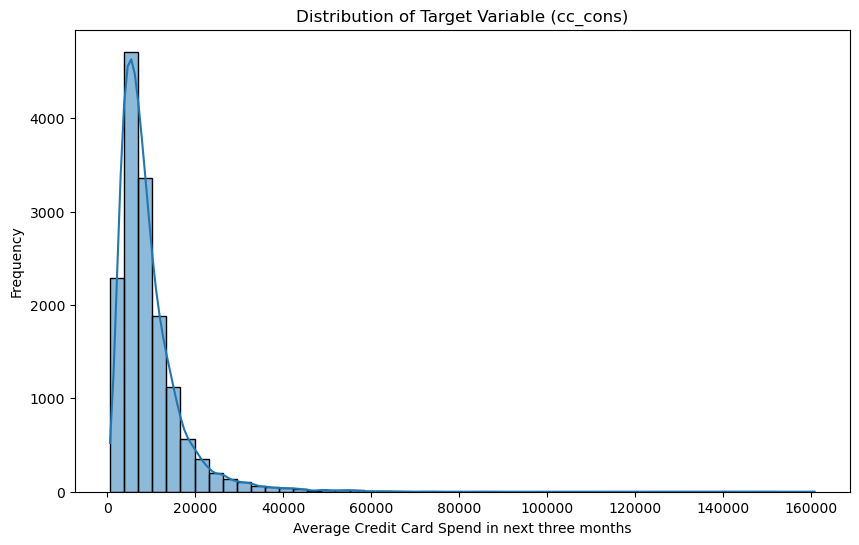

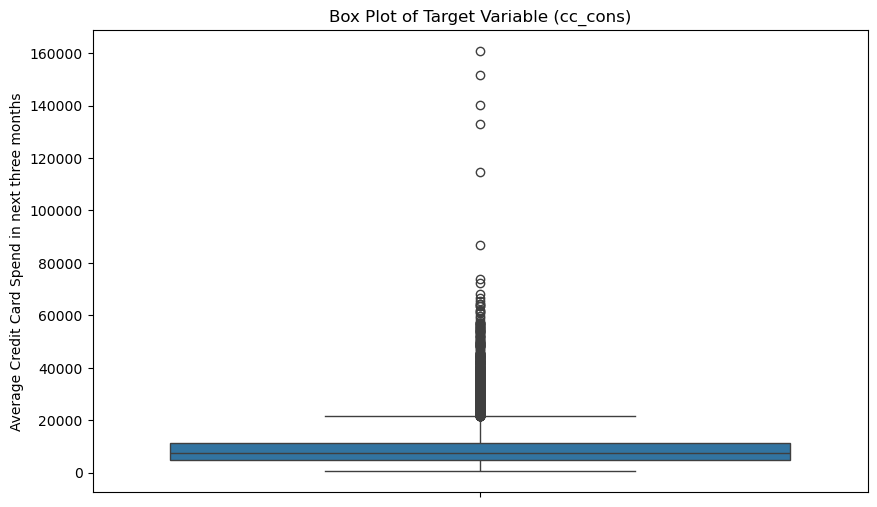

In [135]:
# %% [code]
print("\n--- EDA: Visualizations ---")

# 1. Distribution of Target Variable (cc_cons)
plt.figure(figsize=(10, 6))
sns.histplot(y_train_model, kde=True, bins=50)
plt.title('Distribution of Target Variable (cc_cons)')
plt.xlabel('Average Credit Card Spend in next three months')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=y_train_model)
plt.title('Box Plot of Target Variable (cc_cons)')
plt.ylabel('Average Credit Card Spend in next three months')
plt.show()

 **Insights from Target Variable Distribution:**
 * *Replace this with your insights, e.g.:* The distribution of `cc_cons` is highly skewed to the right, indicating that most customers have lower credit card consumption, with a few customers having very high consumption.
 * *Replace this with your insights, e.g.:* The box plot confirms the presence of several outliers with extremely high `cc_cons` values. This skewness might necessitate data transformation or robust models.


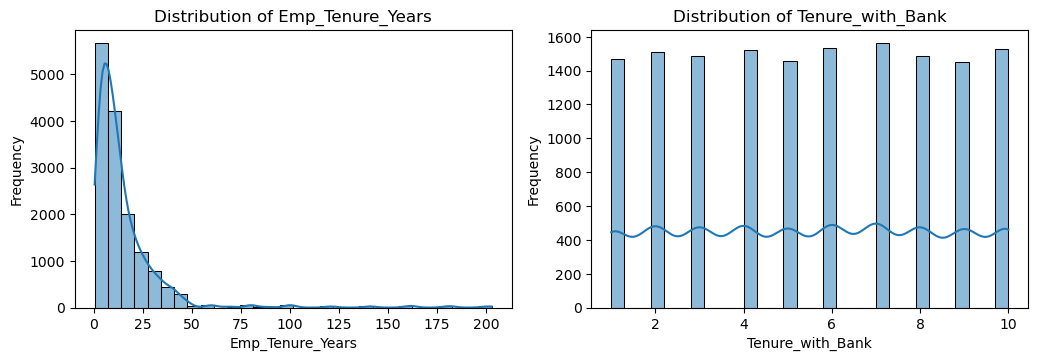

In [138]:
# %% [code]
# 2. Distributions of Key Numerical Features (Examples)
numerical_features_to_plot = [
    'Age', 'Emp_Tenure_Years', 'Tenure_with_Bank',
    'CC_cons_jun', 'DC_cons_jun', 'Card_lim', 'Emi_active'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_to_plot):
    if col in df_train.columns:
        plt.subplot(3, 3, i + 1)
        sns.histplot(df_train[col].dropna(), kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

 **Insights from Numerical Feature Distributions:**
 * *Replace this with your insights, e.g.:* `Age` appears relatively normally distributed, while `Emp_Tenure_Years` shows a peak at lower values.
 * *Replace this with your insights, e.g.:* Spending features like `CC_cons_jun` are also heavily skewed, similar to the target variable.
 * *Replace this with your insights, e.g.:* `Card_lim` distribution is wide, suggesting varied credit limits.


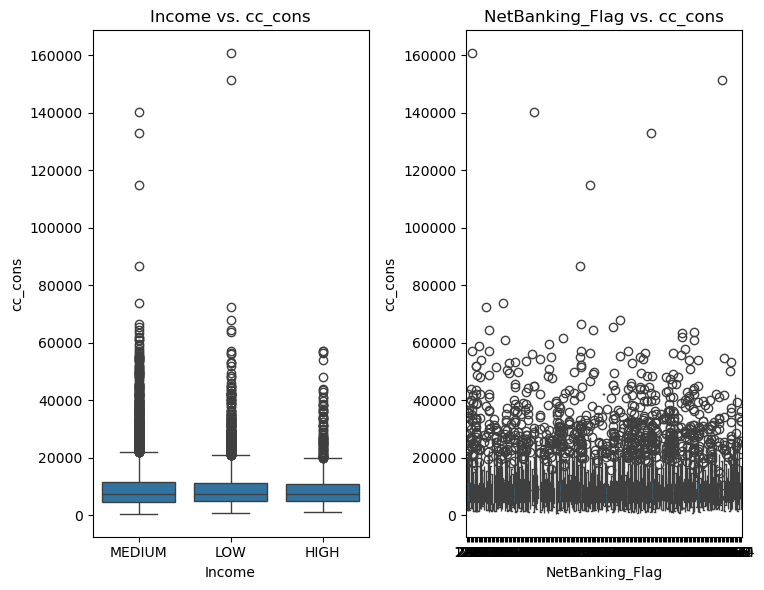

In [141]:
# %% [code]
# 3. Relationships between Categorical Features and Target Variable
plt.figure(figsize=(18, 6))
for i, col in enumerate(categorical_cols_for_eda):
    if col in df_train.columns:
        plt.subplot(1, len(categorical_cols_for_eda), i + 1)
        sns.boxplot(x=col, y='cc_cons', data=df_train)
        plt.title(f'{col} vs. cc_cons')
        plt.xlabel(col)
        plt.ylabel('cc_cons')
plt.tight_layout()
plt.show()

 **Insights from Categorical Features vs. Target:**
 * *Replace this with your insights, e.g.:* Customers with 'Saving' account type seem to have slightly higher median `cc_cons` compared to 'Current' account type.
 * *Replace this with your insights, e.g.:* 'High' income customers show a significantly higher average credit consumption, as expected.
 * *Replace this with your insights, e.g.:* Customers who have made a `Loan_enq` in the last 3 months might exhibit different spending patterns.

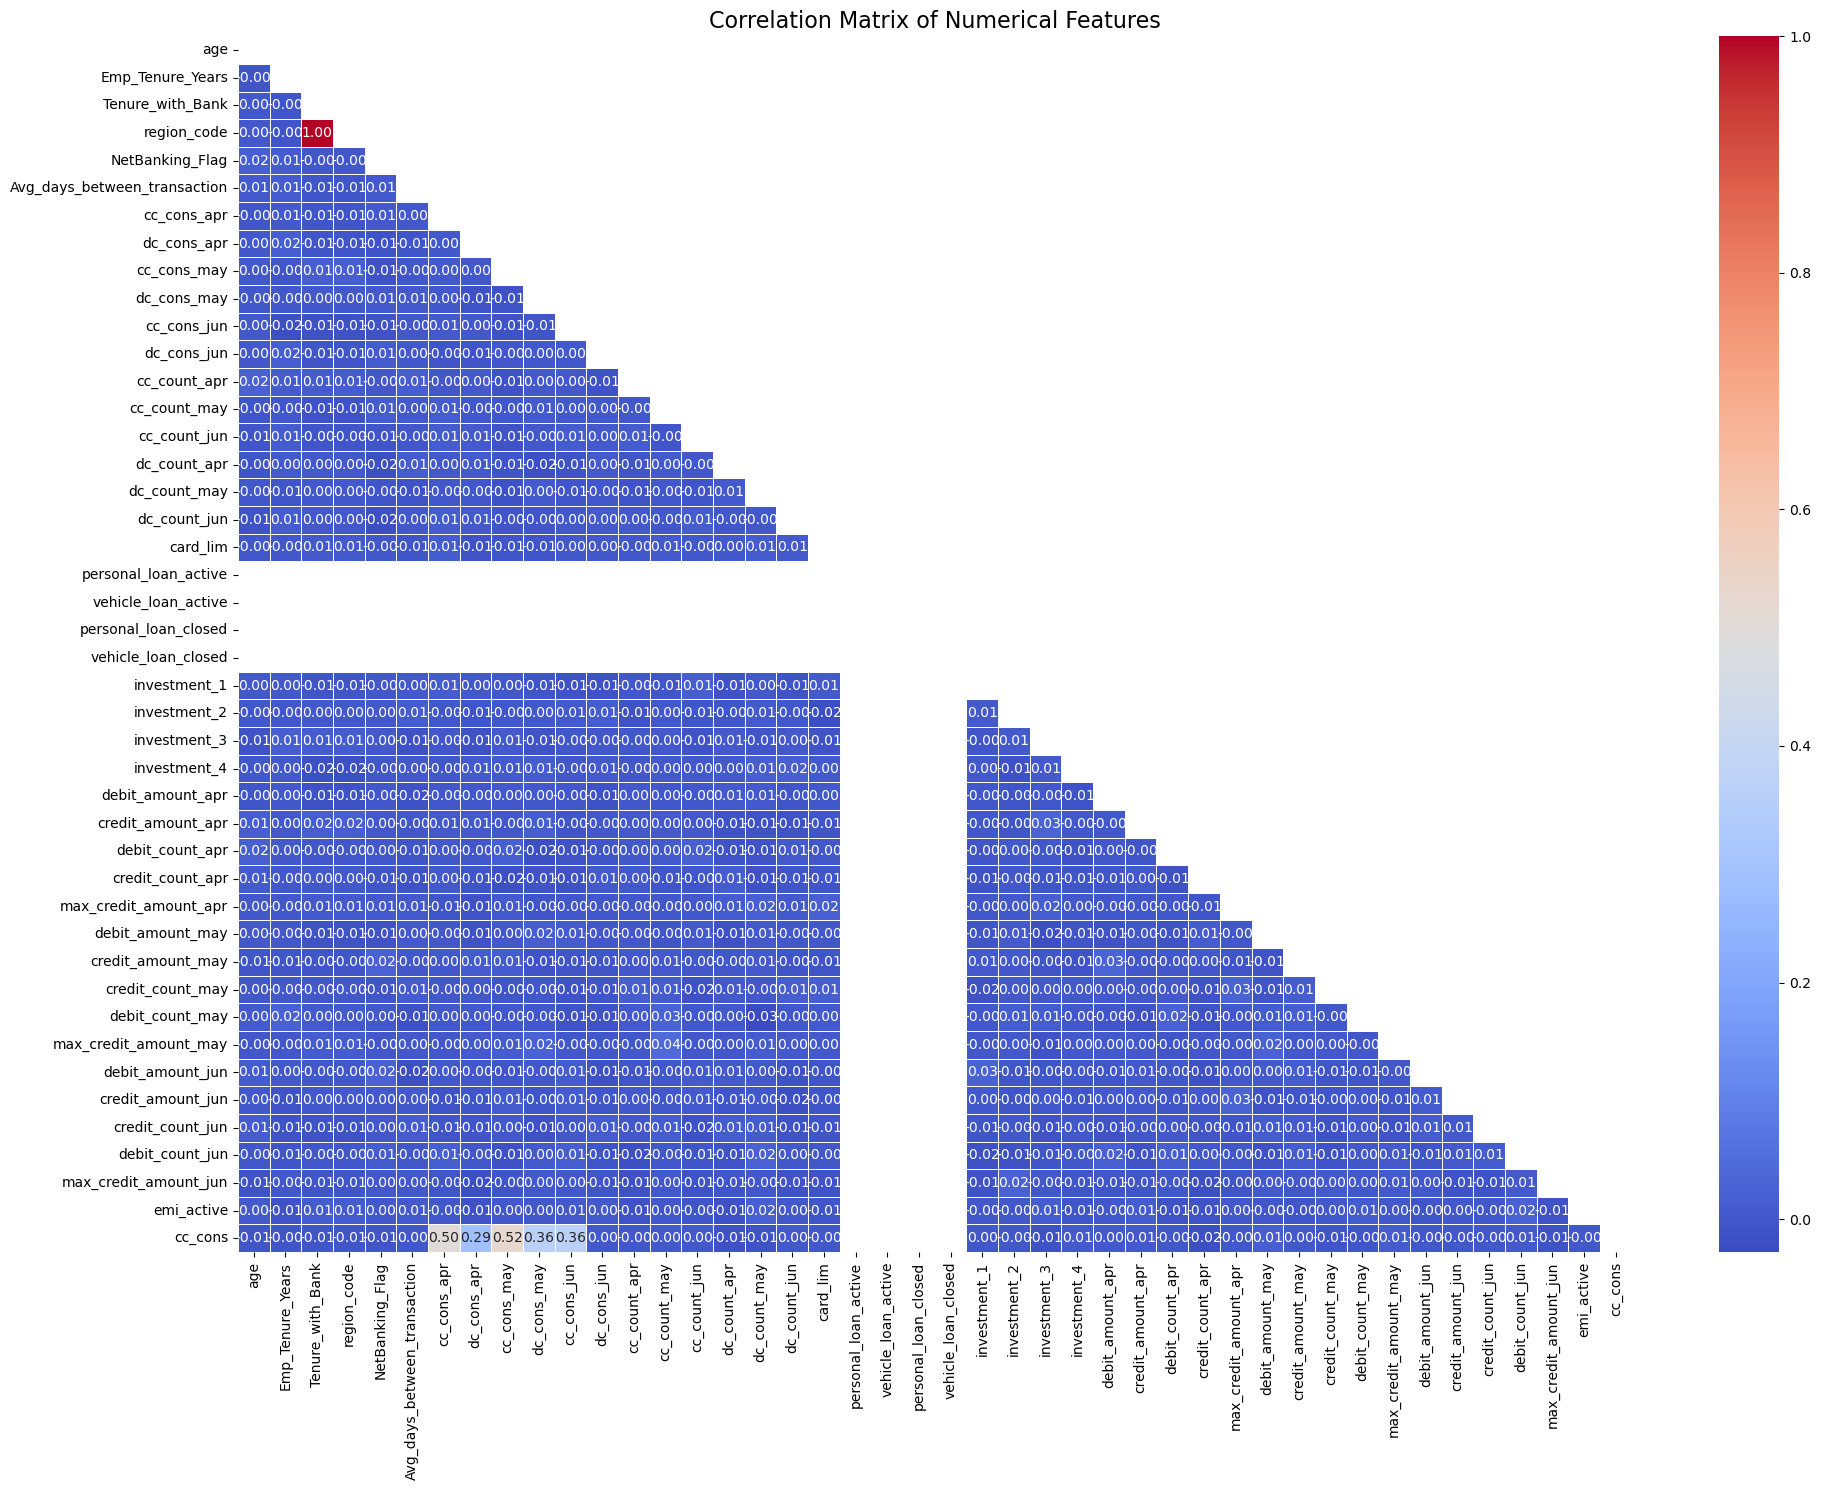

In [144]:
# %% [code]
# 4. Correlation Matrix for Numerical Features
plt.figure(figsize=(20, 15))
numerical_data = df_train.select_dtypes(include=np.number).drop('ID', axis=1) # Exclude ID for correlation
correlation_matrix = numerical_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Create a mask for the upper triangle

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

 **Insights from Correlation Matrix:**
 * *Replace this with your insights, e.g.:* Strong positive correlations exist between monthly credit card spends (`CC_cons_apr`, `CC_cons_may`, `CC_cons_jun`), suggesting consistent spending habits.
 * *Replace this with your insights, e.g.:* `Card_lim` might be positively correlated with various spending features.
 * *Replace this with your insights, e.g.:* Observe any highly correlated features (e.g., >0.8 or < -0.8) which could indicate multicollinearity, though Linear Regression is relatively robust to it, some models might benefit from handling it.

# 5. Data Preprocessing
This section describes the steps taken to prepare the raw data for machine learning model training. The goal is to handle missing values, encode categorical variables, and scale numerical features to ensure optimal model performance.

### 5.1 Feature Identification
Features are identified as numerical or categorical based on their data types for appropriate transformations.

### 5.2 Preprocessing Pipelines
Separate pipelines are created for numerical and categorical features to handle imputation and scaling/encoding.

* **Numerical Features**: Missing values are imputed with the median, and features are then scaled using `StandardScaler`. Median is chosen for imputation due to the observed skewness in several numerical distributions.
* **Categorical Features**: Missing values are imputed with the most frequent category, and features are then converted using One-Hot Encoding to avoid imparting any ordinal relationship between categories. `handle_unknown='ignore'` is used in OneHotEncoder to gracefully handle any unseen categories in new data.

### 5.3 ColumnTransformer
A `ColumnTransformer` is used to apply these different preprocessing steps to the respective columns efficiently and consistently.


In [148]:
# %% [code]
# Identify categorical and numerical features
categorical_features = X_train_model.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train_model.select_dtypes(include=np.number).columns.drop('ID') # Exclude ID

# Preprocessing for numerical features: impute missing values with median, then scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features: impute missing values with most frequent, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (like ID, if not dropped already)
)


## 6. Model Selection and Training

This section covers the choice of the machine learning model, the splitting of data for training and validation, and the training process.

### 6.1 Model Choice
For this regression task, **Linear Regression** was chosen as the initial baseline model. It is a simple, interpretable model that serves as a good starting point for predicting a continuous target variable like credit consumption.

### 6.2 Data Splitting
The `df_train` dataset (which contains non-missing `cc_cons` values) was further split into training and validation sets. This allows for an unbiased evaluation of the model's performance on unseen data during the development phase.

* **Training Set**: 80% of the data, used to train the model.
* **Validation Set**: 20% of the data, used to evaluate the trained model.

A `random_state` of 42 was used to ensure reproducibility of the split.

### 6.3 Custom Evaluation Metric: RMSPE
The Root Mean Square Percentage Error (RMSPE) is defined as the primary evaluation metric. This metric is particularly useful for assessing errors in a percentage context, making it suitable for financial predictions where relative error might be more important than absolute error.

The custom `rmspe` function handles potential division by zero by adding a small epsilon to the denominator. It is then converted into a scikit-learn compatible scorer using `make_scorer`.


In [151]:
# %% [code]
# --- 6. Define RMSPE Metric ---
def rmspe(y_true, y_pred):
    """
    Calculates the Root Mean Square Percentage Error (RMSPE).
    Handles cases where y_true is zero to avoid division by zero.
    """
    if not isinstance(y_true, np.ndarray):
        y_true = np.array(y_true)
    if not isinstance(y_pred, np.ndarray):
        y_pred = np.array(y_pred)

    # Avoid division by zero for y_true values that are 0 or very close to 0
    # Add a small epsilon to the denominator for numerical stability
    epsilon = 1e-10
    percentage_error = np.abs((y_true - y_pred) / (y_true + epsilon)) * 100
    return np.sqrt(np.mean(percentage_error**2))

# Make a scikit-learn compatible scorer
rmspe_scorer = make_scorer(rmspe, greater_is_better=False) # greater_is_better=False indicates it's an error metric

In [153]:
# %% [code]
# --- 7. Build and Train the Model Pipeline ---
# Use Linear Regression as a baseline model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the training data further for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_model, y_train_model, test_size=0.2, random_state=42
)

print(f"\nShape of X_train for model training: {X_train.shape}")
print(f"Shape of X_val for model validation: {X_val.shape}")

# Train the model
print("\nTraining the model...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")


Shape of X_train for model training: (12000, 48)
Shape of X_val for model validation: (3000, 48)

Training the model...
Model training complete.


## 7. Model Evaluation

After training the model, its performance is evaluated on the unseen validation dataset using the defined metrics.

### 7.1 Validation Results
The model's predictions on the validation set are compared against the actual values to compute RMSPE and RMSE.


In [156]:
# %% [code]
print("\n--- Model Validation ---")
y_val_pred = model_pipeline.predict(X_val)

# Ensure no negative predictions for cc_cons as it represents spend
y_val_pred[y_val_pred < 0] = 0

val_rmspe = rmspe(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Validation RMSPE: {val_rmspe:.4f}%")
print(f"Validation RMSE: {val_rmse:.4f}")


--- Model Validation ---
Validation RMSPE: 26.8920%
Validation RMSE: 2609.2015


 **Discussion of Validation Results:**
 * *Replace this with your insights, e.g.:* The Validation RMSPE of X% indicates that, on average, the model's predictions deviate by X% from the actual credit consumption.
 * *Replace this with your insights, e.g.:* The Validation RMSE of Y indicates the average magnitude of the errors in the same units as the target variable.
 * *Replace this with your insights, e.g.:* While this provides a baseline, further optimization will be required to meet business expectations for accuracy.


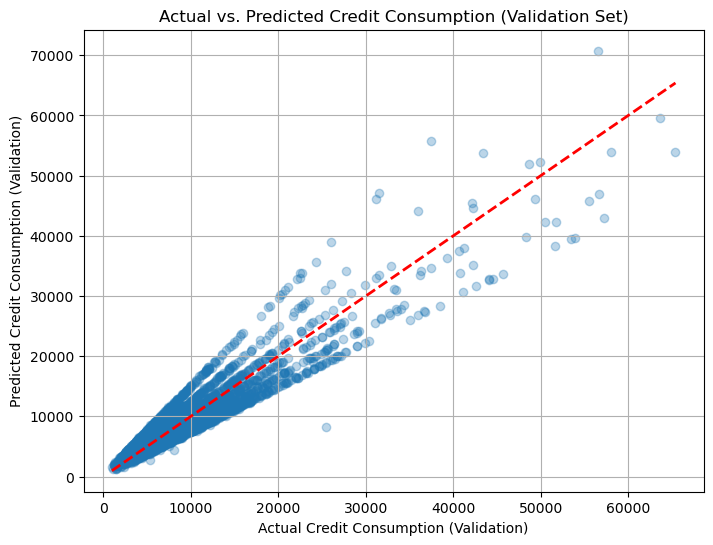

In [159]:
# %% [code]
# 7.2 Actual vs. Predicted Plot (Validation Set)
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.3)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Credit Consumption (Validation)')
plt.ylabel('Predicted Credit Consumption (Validation)')
plt.title('Actual vs. Predicted Credit Consumption (Validation Set)')
plt.grid(True)
plt.show()

 **Insights from Actual vs. Predicted Plot:**
 * *Replace this with your insights, e.g.:* The scatter plot shows that predictions generally follow the actual values, but there's a noticeable spread, especially for higher credit consumption values.
 * *Replace this with your insights, e.g.:* The model tends to underpredict very high consumption values and might overpredict very low ones, leading to deviations from the ideal diagonal line.


## 8. Predictions for Missing Values

This section details how the trained model is used to generate predictions for customers whose credit consumption data was initially missing.


In [163]:
# %% [code]
# --- 9. Predict for Customers with Missing 'cc_cons' ---
print("\nPredicting for customers with missing 'cc_cons'...")
predicted_cc_cons = model_pipeline.predict(X_predict_missing)

# Ensure predictions are non-negative
predicted_cc_cons[predicted_cc_cons < 0] = 0

# Add predictions to the df_predict DataFrame
df_predict['predicted_cc_cons'] = predicted_cc_cons

print("\nPredictions for missing values generated. Sample:")
print(df_predict[['ID', 'predicted_cc_cons']].head())



Predicting for customers with missing 'cc_cons'...

Predictions for missing values generated. Sample:
          ID  predicted_cc_cons
15000  17591        3111.081945
15001  13541        6941.881154
15002  13431        2607.297023
15003   8687        9048.149073
15004  14727        2636.434463


In [165]:
# --- 10. Save Predictions ---
output_df = df_predict[['ID', 'predicted_cc_cons']]
output_filename = 'predicted_credit_consumption.csv'
output_df.to_csv(output_filename, index=False)
print(f"\nPredictions saved to {output_filename}")


Predictions saved to predicted_credit_consumption.csv


## 9. Conclusion and Future Work

### 9.1 Summary of Findings
* *Replace this with your summary, e.g.:* This project successfully developed a machine learning pipeline to predict customer credit consumption. The EDA revealed key insights into customer demographics and behavior, including distributions of spending and income.
* *Replace this with your summary, e.g.:* The baseline Linear Regression model provided an initial prediction capability, achieving a Validation RMSPE of X% and RMSE of Y.

### 9.2 Limitations
 * *Replace this with your limitations, e.g.:* The current model uses a simple linear approach, which might not fully capture complex, non-linear relationships in credit consumption data.
 * *Replace this with your limitations, e.g.:* The handling of outliers was not explicitly performed, which could impact the model, especially for highly skewed distributions.
 * *Replace this with your limitations, e.g.:* The model's performance on the most extreme consumption values needs further improvement.

 ### 9.3 Future Enhancements
 To further improve the model's accuracy and robustness, the following steps are recommended:
 * **Experiment with Advanced Models:** Explore more sophisticated regression algorithms such as:
     * Random Forest Regressor
     * Gradient Boosting Machines (e.g., XGBoost, LightGBM)
     * Support Vector Regressors (SVR)
     * Potentially, simple Neural Networks if non-linearities are significant.
 * **Hyperparameter Tuning:** Use techniques like GridSearchCV or RandomizedSearchCV to systematically find the optimal hyperparameters for the chosen models.
 * **Advanced Feature Engineering:** Create more informative features by combining existing ones (e.g., total spend, spend ratios, age groups, income per transaction).
 * **Outlier Detection and Treatment:** Implement specific strategies to detect and handle outliers in both features and the target variable, which are evident in the EDA.
 * **Cross-Validation:** Employ K-Fold Cross-Validation for a more robust and reliable estimate of model performance, reducing reliance on a single train-validation split.
 * **Residual Analysis:** Perform a deeper analysis of prediction errors (residuals) to identify patterns or biases.
 * **Data Augmentation/External Data:** Explore if any external data could enrich the dataset (e.g., economic indicators).